In [5]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import numpy as np

# seed the random number generator
seed(1)

# generate univariate observations
data = 5 * randn(100) + 50

# normality test
# note that shapiro returns two results, where the first one is stat-value and the other is p-value
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.822
Sample looks Gaussian (fail to reject H0)


The p-value is interested and finds that the data is likely drawn from a Gaussian distribution

p <= alpha: reject H0, not normal.
p > alpha: fail to reject H0, normal.

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('[W7-ex1] test_data_ttest.csv', sep=',', na_values='.')

In [8]:
df

,baseline,experimental
0,7,13
1,3,4
2,7,30
3,2,18
4,21,73
5,25,59
6,3,10
7,1,11
8,76,138
9,49,5


In [10]:
df.describe()

,baseline,experimental
count,21.000000,21.000000
mean,14.476190,25.904762
std,18.321078,31.102901
min,1.000000,4.000000
25%,3.000000,9.000000
50%,7.000000,16.000000
75%,17.000000,24.000000
max,76.000000,138.000000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline,21.0,14.476190,18.321078,1.0,3.0,7.0,17.0,76.0
experimental,21.0,25.904762,31.102901,4.0,9.0,16.0,24.0,138.0


In [11]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B670BAFD08>,
      dtype=object)

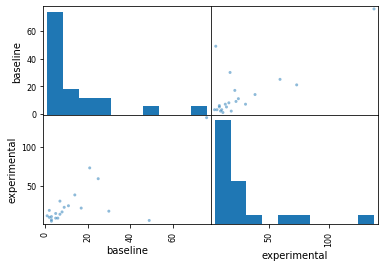

In [12]:
scatter_matrix(df[['baseline', 'experimental']])

 t-test is used to determine if the difference in means between two groups is statistically significant (p < 0.05).

In [13]:
from scipy import stats

In [14]:
print(shapiro(df['baseline']))
print(shapiro(df['experimental']))

(0.6985484957695007, 2.6409576094010845e-05)
(0.6531945466995239, 7.587399977637688e-06)


The data is not normalized (p-values for the both are less than 0.05). Then what should we do? Can't we run the t-test for this case?

There are several ways to make the data normalized, but here are two common methods.

* log transformation
* square-root transformation

In [15]:
print(shapiro(np.log(df['baseline'])))
print(shapiro(np.log(df['experimental'])))

(0.985212504863739, 0.9799241423606873)
(0.9689816832542419, 0.7103953957557678)


In [16]:
# degrees of freedom
# len(one group) - 1 
d_freedom = len(df) - 1
d_freedom

20

In [17]:
stats.ttest_1samp(np.log(df['baseline']), 0)

Ttest_1sampResult(statistic=8.52365955988088, pvalue=4.3174660321581225e-08)

In [18]:
stats.ttest_1samp(np.log(df['experimental']), 0)

Ttest_1sampResult(statistic=14.41593693453903, pvalue=4.994195680138192e-12)

3.2 Two-sample t-test

In [19]:
import numpy as np
import pandas as pd
import scipy

In [20]:
data1 = np.random.normal(0, 1, size=50)
data2 = np.random.normal(2, 1, size=50)

In [21]:
data1

array([-0.44712856,  1.2245077 ,  0.40349164,  0.59357852, -1.09491185,
        0.16938243,  0.74055645, -0.9537006 , -0.26621851,  0.03261455,
       -1.37311732,  0.31515939,  0.84616065, -0.85951594,  0.35054598,
       -1.31228341, -0.03869551, -1.61577235,  1.12141771,  0.40890054,
       -0.02461696, -0.77516162,  1.27375593,  1.96710175, -1.85798186,
        1.23616403,  1.62765075,  0.3380117 , -1.19926803,  0.86334532,
       -0.1809203 , -0.60392063, -1.23005814,  0.5505375 ,  0.79280687,
       -0.62353073,  0.52057634, -1.14434139,  0.80186103,  0.0465673 ,
       -0.18656977, -0.10174587,  0.86888616,  0.75041164,  0.52946532,
        0.13770121,  0.07782113,  0.61838026,  0.23249456,  0.68255141])

In [22]:
data2

array([ 1.68988323, -0.43483776,  3.0388246 ,  4.18697965,  2.44136444,
        1.89984477,  1.86355526,  1.88094581,  2.01740941,  0.87798127,
        1.48290554,  1.00297317,  2.24879916,  1.70335885,  2.49521132,
        1.82529684,  2.98633519,  2.2135339 ,  4.19069973,  0.10363908,
        1.35308331,  2.90148689,  4.52832571,  1.75136522,  2.04366899,
        1.77368576,  3.33145711,  1.71269214,  2.68006984,  1.6801984 ,
        0.72744124,  2.31354772,  2.50318481,  3.29322588,  1.88955297,
        1.38263794,  2.5627611 ,  2.24073709,  2.28066508,  1.9268873 ,
        3.16033857,  2.36949272,  3.90465871,  3.1110567 ,  2.6590498 ,
        0.37256166,  2.60231928,  2.4202822 ,  2.81095167,  3.04444209])

In [23]:
print(shapiro(data1))
print(shapiro(data2))

(0.9748397469520569, 0.35984036326408386)
(0.9790357947349548, 0.5120506286621094)


In [24]:
# degrees of freedom
# len(one group) - len(the other group) - 2 (because we are comparing two groups)
d_freedom = len(data1) + len(data2) - 2
d_freedom

98

In [25]:
# t-test
scipy.stats.ttest_ind(data1, data2)

Ttest_indResult(statistic=-11.376003947462761, pvalue=1.289711334095533e-19)

Result interpretation
* The p-value is less than 0.05.
* Therefore, the null hypothesis (i.e., there does not exist a difference between data1 and data2) is rejected.

3.3 Paired t-test

In [26]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv', sep=',', index_col=0, na_values='.')
df.head()

,sex,agegrp,bp_before,bp_after
patient,,,,
1,Male,30-45,143,153
2,Male,30-45,163,170
3,Male,30-45,153,168
4,Male,30-45,153,142
5,Male,30-45,146,141


In [27]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


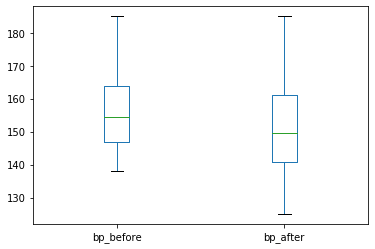

In [28]:
df[['bp_before', 'bp_after']].plot(kind='box')

There are a few ways one can test this assumption – make a histogram, use a Q-Q plot, and/or use a statistical test.

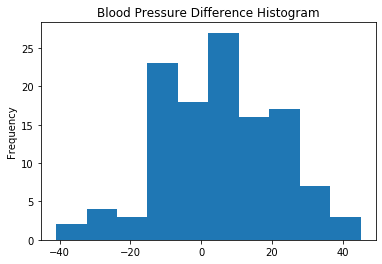

In [29]:
df['bp_difference'] = df['bp_before'] - df['bp_after']
df['bp_difference'].plot(kind='hist', title= 'Blood Pressure Difference Histogram')

Table explanation
* The histogram of our data seems to be normally distributed.
* Another way to check for normally distributed data is to use a Q-Q plot.
* If you’re unfamiliar with how to read a Q-Q plot, the data should be on the red line.
* If it’s not, then it suggests that the data may not be normally distributed.

Text(0.5, 1.0, 'Blood pressure Difference Q-Q Plot')

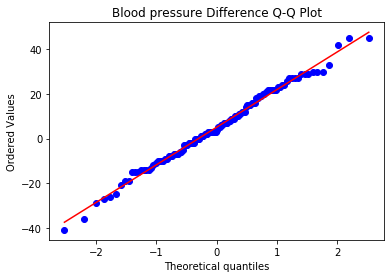

In [30]:
stats.probplot(df['bp_difference'], plot= plt)
plt.title('Blood pressure Difference Q-Q Plot')

Plot explanation
* There is some deviation from normality, but it does not appear to be severe so there is no need to worry.
* To be sure, let’s test this statistically to see if the data is normally distributed.
* To test this, one can use the Shapiro-Wilk test for normality. Unfortunately the output is not labeled.
* The first value is the W test value, and the second value it the p-value.

In [31]:
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

In [32]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)